# Hand writing recognition

to train a model, we have the step as follow:
1. load data
2. define model
3. define loss and optimizer
4. train model
5. test model


In [117]:
import torch

def one_hot2(label, depth=10):
    return torch.zeros(depth).scatter_(0, label, 1)

def one_hot(label, depth=10):
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1, 1)
    out.scatter_(dim=1, index=idx, value=1)
    return out

In [118]:
# import dependencies
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt

In [119]:
batch_size = 512

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('files/', train=True, download=True,
                                 transform=torchvision.transforms.Compose([
                                        torchvision.transforms.ToTensor(),
                                        torchvision.transforms.Normalize(
                                            (0.1307,), (0.3081,))
                                    ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('files/', train=False, download=True,
                                    transform=torchvision.transforms.Compose([
                                        torchvision.transforms.ToTensor(),
                                        torchvision.transforms.Normalize(
                                            (0.1307,), (0.3081,))
                                    ])),
    batch_size=batch_size, shuffle=False)


torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


Text(0.5, 1.0, 'label: 7')

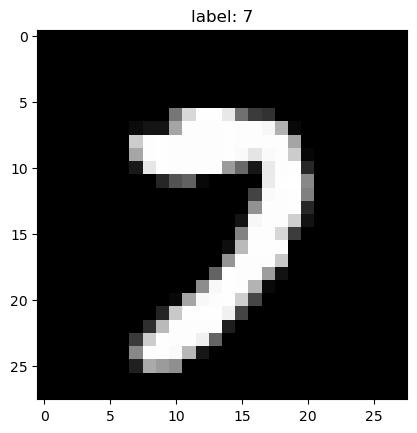

In [120]:
x,y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())

# select a sample
select = 36
plt.imshow(x[select, 0], cmap='gray')
plt.title('label: %d' % y[select])

In [121]:
# create a new network
class Net(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs).__init__()

        # xw+b
        self.fc1 = nn.Linear(28*28, 256) # 256 is self-defined
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # first
        x = self.fc1(x)
        x = F.relu(x) # activation function

        # second
        x = self.fc2(x)
        x = F.relu(x)

        # third
        x = self.fc3(x)

        return x

In [122]:
# training
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
train_loss = []

for epoch in range(3):

    for batch_idx, (x,y) in enumerate(train_loader):

        x = x.view(x.size(0), 28*28) # flatten
        out = net(x) # flatten
        y_onehot = one_hot(y)

        loss = F.mse_loss(out, y_onehot)

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

        if batch_idx % 100 == 0:
            print(epoch, batch_idx, loss.item())
    
        

0 0 0.1042761579155922
0 100 0.05546167492866516
1 0 0.05170509219169617
1 100 0.04181142896413803
2 0 0.03898124769330025
2 100 0.033722102642059326


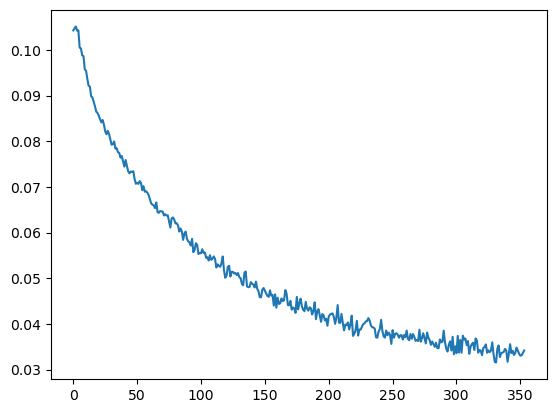

In [125]:
# plot loss
plt.plot(train_loss)

In [123]:
total_correct = 0
for x,y in test_loader:
    x = x.view(x.size(0), 28*28)
    out = net(x)
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

total_num = len(test_loader.dataset)
acc = total_correct / total_num
print('test acc:', acc)

test acc: 0.885


tensor([9])


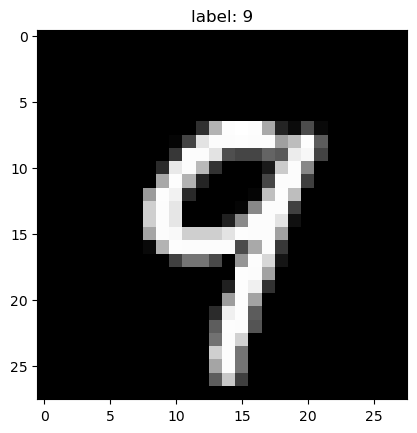

In [124]:
choose = 12

x,y = next(iter(test_loader))
x = x[choose,0]
select = x.view(1, 28*28)

plt.imshow(x, cmap='gray')
plt.title('label: %d' % y[choose])

out = net(select)
pred = out.argmax(dim=1)
print(pred)


how "scatter_" work?

In [130]:
import torch
a = torch.arange(10).reshape(2,5).float()
b = torch.zeros(3, 5)
b_= b.scatter(dim=1, index=torch.LongTensor([[1, 2, 1, 1, 2], [2, 0, 2, 1, 0]]),src=a)
print(b_)

tensor([[0., 3., 4., 0., 0.],
        [9., 8., 7., 0., 0.],
        [0., 0., 0., 0., 0.]])
